给定函数 $f(x) = \frac{1}{2} \langle [A(x)^{\top} A(x)]^{-1}, p p^{\top} \rangle$，我们需要求它关于向量 $x$ 的梯度。

首先，注意到函数的形式中包含了矩阵的逆，因此我们需要用到矩阵求导的相关知识。特别是，我们要用到以下两个公式：

1. **矩阵求导公式**: 如果 $A(x)$ 是关于 $x$ 的矩阵，那么 $A(x)^{-1}$ 关于 $x$ 的导数是：
$$
    \frac{\partial A(x)^{-1}}{\partial x_i} = -A(x)^{-1} \frac{\partial A(x)}{\partial x_i} A(x)^{-1}
$$
2. **迹函数的求导公式**: 对于标量函数 $f(x) = \text{Tr}(B(x))$，其中 $B(x)$ 是关于 $x$ 的矩阵，有：
$$
    \frac{\partial f(x)}{\partial x_i} = \text{Tr}\left(\frac{\partial B(x)}{\partial x_i}\right)
$$
### 具体推导步骤

**Step 1**: 将函数 $f(x)$ 重新表达为迹的形式：
$$
    f(x) = \frac{1}{2} \text{Tr} \left( [A(x)^{\top} A(x)]^{-1} p p^{\top} \right)
$$
**Step 2**: 利用迹函数求导的公式，对 $x$ 求导：
$$
    \frac{\partial f(x)}{\partial x_i} = \frac{1}{2} \text{Tr} \left( \frac{\partial [A(x)^{\top} A(x)]^{-1}}{\partial x_i} p p^{\top} \right)
$$
**Step 3**: 代入矩阵逆的求导公式：
$$
    \frac{\partial [A(x)^{\top} A(x)]^{-1}}{\partial x_i} = -[A(x)^{\top} A(x)]^{-1} \frac{\partial [A(x)^{\top} A(x)]}{\partial x_i} [A(x)^{\top} A(x)]^{-1}
$$
因此：
$$
    \frac{\partial f(x)}{\partial x_i} = -\frac{1}{2} \text{Tr} \left( [A(x)^{\top} A(x)]^{-1} \frac{\partial [A(x)^{\top} A(x)]}{\partial x_i} [A(x)^{\top} A(x)]^{-1} p p^{\top} \right)
$$
**Step 4**: 进一步简化 $\frac{\partial [A(x)^{\top} A(x)]}{\partial x_i}$：
$$
    \frac{\partial [A(x)^{\top} A(x)]}{\partial x_i} = \frac{\partial A(x)^{\top}}{\partial x_i} A(x) + A(x)^{\top} \frac{\partial A(x)}{\partial x_i}
$$
所以最终梯度表达式为：
$$
    \frac{\partial f(x)}{\partial x_i} = -\frac{1}{2} \text{Tr} \left( [A(x)^{\top} A(x)]^{-1} \left(\frac{\partial A(x)^{\top}}{\partial x_i} A(x) + A(x)^{\top} \frac{\partial A(x)}{\partial x_i}\right) [A(x)^{\top} A(x)]^{-1} p p^{\top} \right)
$$
**Step 5**: 将结果整合为梯度向量的形式 $\nabla_x f(x)$：

梯度向量 $\nabla_x f(x)$ 的每个分量 $i$ 都是上面表达式的对应部分，因此最终结果为：
$$
    \nabla_x f(x) = -\frac{1}{2} \sum_{i=1}^{r} \text{Tr} \left( [A(x)^{\top} A(x)]^{-1} \left(\frac{\partial A(x)^{\top}}{\partial x_i} A(x) + A(x)^{\top} \frac{\partial A(x)}{\partial x_i}\right) [A(x)^{\top} A(x)]^{-1} p p^{\top} \right) e_i
$$
其中 $e_i$ 是标准基向量。

这就是函数 $f(x)$ 关于向量 $x$ 的梯度。


In [596]:
# 等距eigenvalue下的梯度计算

import numpy as np
from scipy.linalg import inv
from scipy.optimize import approx_fprime

# Define the function to compute f(x)
r = 3
p = np.arange(1,r+1)

def f(x):
    r = len(x)
    A = np.array([[np.sin(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    A_t_A_inv = inv(A.T @ A)
    return 0.5 * np.trace(A_t_A_inv @ np.outer(p, p))

# Define the analytical gradient computation
def analytical_gradient(x):
    r = len(x)
    A = np.array([[np.sin(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    A_1 = np.array([[k * np.cos(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    A_t_A_inv = np.linalg.inv(A.T @ A)
    D = A_1 @ A_t_A_inv @ np.outer(p, p) @ np.linalg.inv(A)
    grad = - np.diag(D)
    return grad

# Define the function to compute numerical gradient
def numerical_gradient(x, epsilon=1e-8):
    return approx_fprime(x, lambda x: f(x), epsilon)

# Test case

x = np.random.uniform(0, np.pi, r)
# x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

# Compute analytical and numerical gradients
grad_analytical = analytical_gradient(x)
grad_numerical = numerical_gradient(x)

grad_analytical, grad_numerical, np.allclose(grad_analytical, grad_numerical, rtol=1e-5, atol=1e-5)


(array([ 5000626.09585663,  3392814.24566668, 71935496.19069904]),
 array([ 5001016.86467865,  3392315.38552513, 71936399.43788822]),
 False)

In [597]:
# 非等距eigenvalue下的梯度计算，可以只考虑任意奇数阶的PSR

import numpy as np
from scipy.linalg import inv
from scipy.optimize import approx_fprime

d = 1

# Define the function to compute f(x)
r = 2
Omegas = np.random.rand(r) * 10  # Example frequencies
Omegas = np.arange(1, r + 1)  # Example frequencies

p = Omegas ** d * (-1 if d % 4 == 3 else 1)

def f(x):
    A = np.sin(np.outer(x, Omegas))
    A_t_A_inv = inv(A.T @ A)
    return 0.5 * np.trace(A_t_A_inv @ np.outer(p, p))

# Define the analytical gradient computation
def analytical_gradient(x):
    A = np.sin(np.outer(x, Omegas))
    # # 使用 NumPy 的广播机制，将 b 的元素分别乘以 A 的列
    A_1 =  np.cos(np.outer(x, Omegas)) * Omegas
    A_inv = np.linalg.inv(A)
    b = np.linalg.inv(A.T) @ p
    # A_t_A_inv = np.linalg.inv(A.T @ A)
    # D = A_1 @ A_t_A_inv @ np.outer(p, p) @ np.linalg.inv(A)
    grad = - np.diag(A_1 @ A_inv @ np.outer(b, b))
    return grad

# Define the function to compute numerical gradient
def numerical_gradient(x, epsilon=1e-8):
    return approx_fprime(x, lambda x: f(x), epsilon)

# Test case

x = np.random.uniform(0, np.pi, r)
# x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

# Compute analytical and numerical gradients
grad_analytical = analytical_gradient(x)
grad_numerical = numerical_gradient(x)

grad_analytical, grad_numerical, np.allclose(grad_analytical, grad_numerical, rtol=1e-5, atol=1e-5)


(array([-7.89377416,  4.14661762]), array([-7.89377359,  4.14661787]), True)

In [598]:
from scipy.optimize import minimize

# Set the bounds for each element of x to be between 0 and pi
bounds = [(0, np.pi)] * r  # r is the dimensionality of x

# Use minimize function with bounds to find the optimal x
result = minimize(f, x, jac=analytical_gradient, method='BFGS')

# Optimal x and the corresponding minimum value of f(x)
optimal_x = result.x


# optimal_x, minimum_f


In [599]:
analytical_gradient(optimal_x)

array([ 1.85600000e-06, -5.59495441e-06])

In [600]:
x=optimal_x
A = np.sin(np.outer(x, Omegas))
# # 使用 NumPy 的广播机制，将 b 的元素分别乘以 A 的列
A_1 =  np.cos(np.outer(x, Omegas)) * Omegas
A_inv = np.linalg.inv(A)
np.linalg.inv(A.T @ A)

array([[ 1.07344694, -0.12994567],
       [-0.12994567,  0.56324366]])

In [601]:
A.T @ A

array([[0.95834346, 0.22109895],
       [0.22109895, 1.82644017]])

In [602]:
b = np.linalg.inv(A.T) @ p
# A_t_A_inv = np.linalg.inv(A.T @ A)
# D = A_1 @ A_t_A_inv @ np.outer(p, p) @ np.linalg.inv(A)
E = A_1 @ A_inv @ np.outer(b, b)
E

array([[-1.85600000e-06,  6.35229992e-06],
       [-1.63472058e-06,  5.59495441e-06]])

In [603]:
b

array([-0.46984195,  1.60806948])

In [604]:
optimal_x

array([2.52608503, 0.91172157])

In [605]:
optimal_x_pi  = optimal_x/np.pi
optimal_x_pi

array([0.80407784, 0.29020999])

In [606]:
np.pi/3

1.0471975511965976

In [607]:
A_1 @ A_inv

array([[-1.01005204, -0.29511216],
       [ 0.75756641,  0.22134613]])

In [608]:
def p_1_x(x, Omega_values):
    return np.array([Omega * np.cos(Omega * x) for Omega in Omega_values]).T

for i in range(r):
    val = np.inner(p_1_x(x[i], Omegas), np.linalg.inv(A.T @ A) @ p)
    print(val)


3.950264585883545e-06
3.479298926190033e-06


In [609]:
x

array([2.52608503, 0.91172157])

In [610]:
p_1_x(x[0], Omegas)

array([-0.81648046,  0.6665614 ])

In [611]:
np.inner(p_1_x(x[0], Omegas),  p)

0.516642326255104

In [612]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_mod_2pi(x):
    # 将所有成分 mod 2pi 处理
    x_mod = np.mod(x, 2 * np.pi)
    
    # 将所有成分放到 0 到 pi 之间，如果超过 pi，取关于 pi 对称的那个点
    x_adjusted = np.where(x_mod > np.pi, 2 * np.pi - x_mod, x_mod)
    
    # 创建图形
    plt.figure(figsize=(8, 4))
    plt.axhline(0, color='black', linewidth=0.5)  # 绘制x轴
    plt.scatter(x_adjusted, [0] * len(x_adjusted), color='red', s=100, zorder=3)  # 标注红色点
    
    # 标记x上的数值
    for xi in x_adjusted:
        plt.text(xi, 0.02, f'{xi:.2f}', ha='center', fontsize=10, fontweight='bold')
    
    # 设置 x 轴刻度为 pi 单位
    ticks = np.arange(0, np.pi + np.pi/2, np.pi/2)
    tick_labels = ['0', r'$\frac{\pi}{2}$', r'$\pi$']
    plt.xticks(ticks, tick_labels)

    # 设置x轴范围，扩展至稍大于 pi
    plt.xlim(0, np.pi + 0.5)
    plt.yticks([])  # 隐藏y轴刻度
    plt.title('Red Points on x-axis (Adjusted with mod 2pi)', fontsize=14, fontweight='bold')

    # 显示图表
    plt.show()

# 调用函数绘制图形
# plot_vector_mod_2pi(optimal_x)


# import numpy as np
# import matplotlib.pyplot as plt

# def plot_vector_mod_2pi(x):
#     # 创建图形
#     plt.figure(figsize=(8, 4))
#     plt.axhline(0, color='black', linewidth=0.5)  # 绘制 x 轴
#     plt.scatter(x, [0] * len(x), color='red', s=100, zorder=3)  # 标注红色点
    
#     # 标记 x 上的数值
#     for xi in x:
#         plt.text(xi, 0.02, f'{xi:.2f}', ha='center', fontsize=10, fontweight='bold')
    
#     # 动态设置 x 轴刻度和范围
#     max_x = np.max(x)
#     ticks = np.arange(0, max_x + np.pi / 2, np.pi / 2)
#     tick_labels = [f'{tick:.2f}' for tick in ticks]  # 用数值显示刻度
#     plt.xticks(ticks, tick_labels)

#     # 设置 x 轴范围，扩展至稍大于最大值
#     plt.xlim(0, max_x + 0.5)
#     plt.yticks([])  # 隐藏 y 轴刻度
#     plt.title('Red Points on x-axis (Original Data)', fontsize=14, fontweight='bold')

#     # 显示图表
#     plt.show()

# # 调用函数绘制图形
# # optimal_x = np.array([1, 3, 5, 7, 9])
# plot_vector_mod_2pi(optimal_x)







In [613]:
optimal_x

array([2.52608503, 0.91172157])

In [614]:
2.08499932-1.39695982

0.6880395000000001

In [615]:
2.78978083-2.08499932

0.7047815100000001

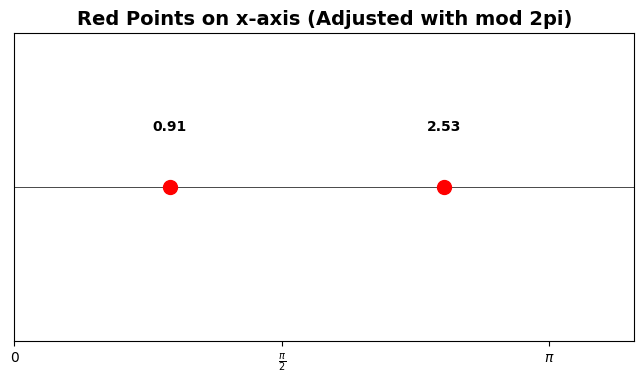

In [616]:
plot_vector_mod_2pi(optimal_x)

In [617]:
f(optimal_x-0.01)

1.4039085583336504

1.5


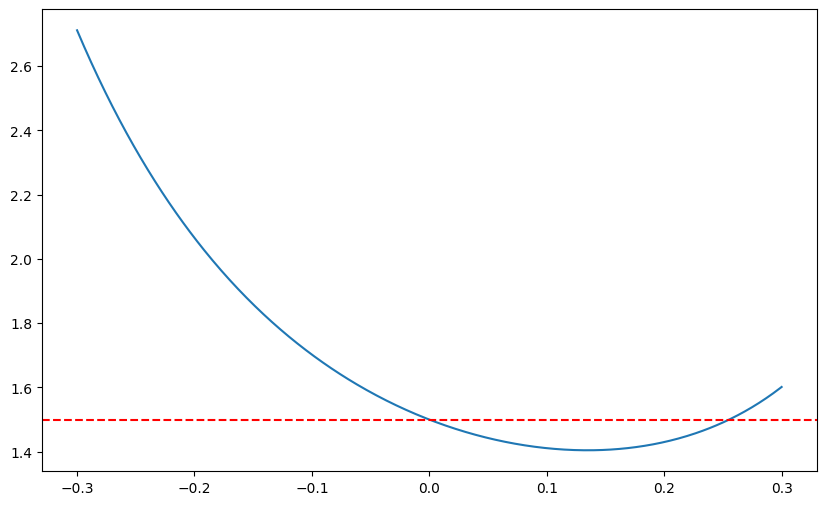

In [618]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

y_values = np.linspace(-0.3, 0.3, 500)

# Compute f(x + y) for all values of y
f_values = np.array([f(x + y) for y in y_values])

# Find the y value where f(x + y) reaches its minimum
min_index = np.argmin(f_values)
min_y = y_values[min_index]
min_f_value = f_values[min_index]

# Plot how f(x + y) changes as y changes
plt.figure(figsize=(10, 6))
plt.plot(y_values, f_values, label="f(x + y)")

# Adding the horizontal line for f at y = 0
plt.axhline(y=f(x), color='r', linestyle='--', label=f'f(x) at y=0 = {f(x):.2f}')
print(f(x))
plt.show()


In [619]:
x_shift = x + np.random.uniform(0, 0.1, size=())
A = np.sin(np.outer(x_shift, Omegas))
print(f(x))
print(f(x_shift))
print(A.T @ A)
print(np.linalg.inv(A.T @ A))

1.5
1.4552671897700575
[[1.         0.05184479]
 [0.05184479 1.98920473]]
[[ 1.00135306 -0.02609834]
 [-0.02609834  0.50339367]]


In [620]:
min(f_values)

1.404544514798769

In [621]:
A = np.sin(np.outer(x+min_y, Omegas))
print(f(x+min_y))
print(A.T @ A)
print(np.linalg.inv(A.T @ A))

1.404544514798769
[[1.         0.18378144]
 [0.18378144 1.8571518 ]]
[[ 1.01852367 -0.10079184]
 [-0.10079184  0.54843318]]


In [622]:
A = np.sin(np.outer(x, Omegas))
print(f(x))
print(A.T @ A)
print(np.linalg.inv(A.T @ A))

1.5
[[1. 0.]
 [0. 2.]]
[[1.  0. ]
 [0.  0.5]]


In [623]:
f(optimal_x)

1.4033194536821623

1.5
[1.         1.01333333 1.02666667 1.04       1.05333333 1.06666667
 1.08       1.09333333 1.10666667 1.12      ]
factor is 1.08
x is [0.78539816 2.4818582 ]


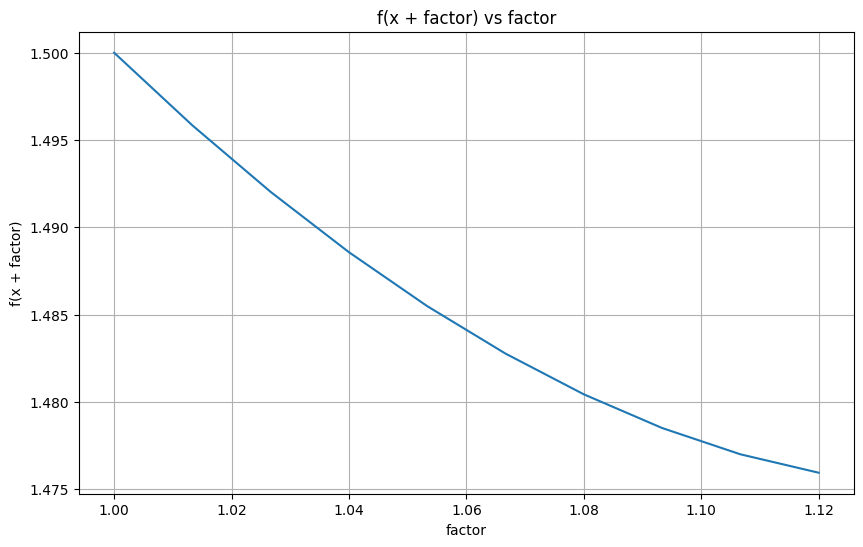

In [624]:
x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])
print(f(x))

import numpy as np
import matplotlib.pyplot as plt

# 计算 x
x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

factors = np.linspace(1, 1.12, 10)
print(factors)

def generate_scale_x(factor):
    x_factor = np.array([np.pi / (2 * r) + (mu - 1) * np.pi / r * factor for mu in range(1, r + 1)])
    if factor == 1.08:
        print('factor is 1.08')
        print('x is', x_factor)
    return x_factor



# 初始化 f_values，确保是二维数组
f_values = []

# 计算 f(x, Omegas)
for factor in factors:
    f_values.append(f(generate_scale_x(factor)))

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(factors, f_values)
plt.title('f(x + factor) vs factor')
plt.xlabel('factor')
plt.ylabel('f(x + factor)')
plt.grid()
plt.show()


In [625]:
factor = 1.08
x_factor = np.array([np.pi / (2 * r) + (mu - 1) * np.pi / r * factor for mu in range(1, r + 1)])
A = np.sin(np.outer(x_factor, Omegas))
print(f(x_factor))
print(A.T @ A)
print(np.linalg.inv(A.T @ A))
print(np.linalg.inv(A.T) @ p )

1.4804389206423472
[[0.87565506 0.11345533]
 [0.11345533 1.93815334]]
[[ 1.15072994 -0.06736126]
 [-0.06736126  0.51989823]]
[ 1.69086095 -0.31916625]


In [626]:
np.pi/(r)

1.5707963267948966

In [627]:
np.pi / r * factor

1.6964600329384885

1.5


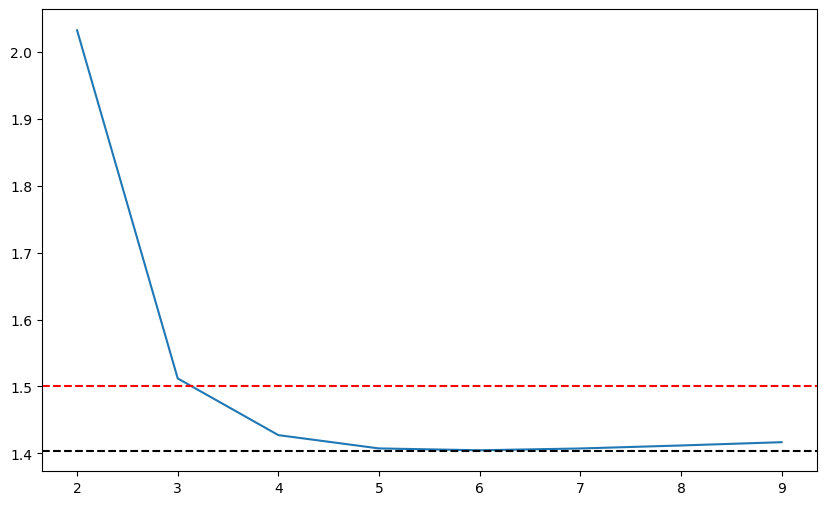

In [628]:
range_n = range(2, 10)
shift_values = [ (1/n) * np.pi/(2*r) for n in range_n]
# Compute f(x + y) for all values of y
f_values = np.array([f(x + shift) for shift in shift_values])

# Plot how f(x + y) changes as y changes
plt.figure(figsize=(10, 6))
plt.plot(range_n, f_values, label="f(x + y)")

# Adding the horizontal line for f at y = 0
plt.axhline(y=f(x), color='r', linestyle='--', label=f'f(x) at y=0 = {f(x):.2f}')
plt.axhline(y=f(optimal_x), color='k', linestyle='--', label=f'f(optimal_x) at y=0 = {f(x):.2f}')
plt.xticks(range_n)

print(f(x))
plt.show()

1.5


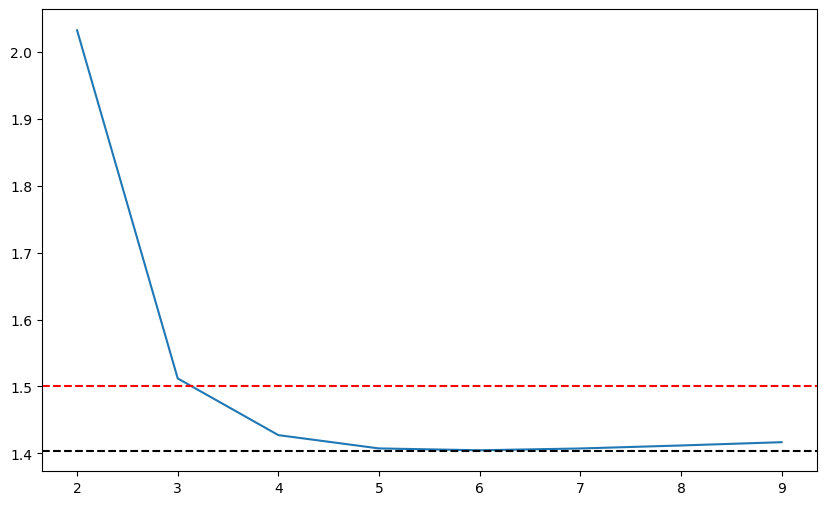

In [629]:
x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])
range_n = range(2, 10)
shift_values = [ (1/n) * np.pi/(2*r) for n in range_n]
# Compute f(x + y) for all values of y
f_values = np.array([f(x + shift) for shift in shift_values])

# Plot how f(x + y) changes as y changes
plt.figure(figsize=(10, 6))
plt.plot(range_n, f_values, label="f(x + y)")

# Adding the horizontal line for f at y = 0
plt.axhline(y=f(x), color='r', linestyle='--', label=f'f(x) at y=0 = {f(x):.2f}')
plt.axhline(y=f(optimal_x), color='k', linestyle='--', label=f'f(optimal_x) at y=0 = {f(x):.2f}')
plt.xticks(range_n)

print(f(x))
plt.show()


1.5


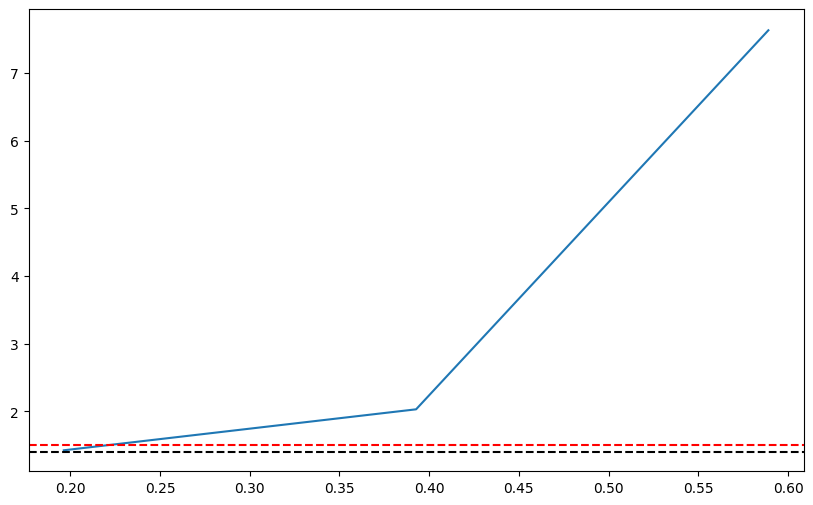

In [630]:
x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

shift_values = np.linspace(0, np.pi/(2*r), 5)[1:-1]

# Compute f(x + y) for all values of y
f_values = np.array([f(x + shift) for shift in shift_values])

# Plot how f(x + y) changes as y changes
plt.figure(figsize=(10, 6))
plt.plot(shift_values, f_values, label="f(x + y)")

# Adding the horizontal line for f at y = 0
plt.axhline(y=f(x), color='r', linestyle='--', label=f'f(x) at y=0 = {f(x):.2f}')
plt.axhline(y=f(optimal_x), color='k', linestyle='--', label=f'f(optimal_x) at y=0 = {f(x):.2f}')
# plt.xticks(shift_values)

print(f(x))
plt.show()

In [631]:
f_values

array([1.42726352, 2.03224913, 7.63053514])

In [632]:
print(f(optimal_x))
print(f(x))
Omegas = np.arange(1, r + 1)  # Example frequencies
n=3
x = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])
x_shift=x + np.pi/(2*r) * (1/n)
print(f(x_shift))
A = np.sin(np.outer(x_shift, Omegas))
ATA=A.T @ A 
ATA

1.4033194536821623
1.5
1.511966128287415


array([[1.       , 0.3169873],
       [0.3169873, 1.5      ]])

In [481]:
np.linalg.inv(ATA)

array([[ 1.17157288, -0.44834153],
       [-0.44834153,  1.17157288]])

In [482]:
A.T

array([[ 0.92387953,  0.38268343],
       [ 0.70710678, -0.70710678]])

In [483]:
np.linalg.inv(A.T)

array([[ 0.76536686,  0.41421356],
       [ 0.76536686, -1.        ]])

In [484]:
np.linalg.inv(A.T)@p

array([ 1.59379399, -1.23463314])

In [154]:
def S(m,r):
    e3=np.exp(1j * np.pi * 3*m / (4*r))
    e2=np.exp(1j * np.pi * m / (4*r))
    e1=np.exp(1j * np.pi * m / (r))
    return (e3-e2) / (1-e1) 

S(5,r)


(-0.630236207005132+1.3877787807814457e-16j)

In [155]:
-np.exp(1j * np.pi *5 / (4*r)) / (1+np.exp(1j * np.pi *5/ (2*r)))

(-0.6302362070051323+0j)

In [156]:
ROW=2
COL=3
0.5*(S(ROW-COL,r)-S(ROW+COL,r))
0.5*(S(ROW-COL,r)-S(ROW+COL,r)) - ATA[ROW-1, COL-1]

(4.163336342344337e-17-6.938893903907228e-17j)

In [157]:
# 计算对于不同正整数 m 的最后输出值
results = {m: np.sum(np.cos(x_shift * m)) for m in range(0, 33)}  # 计算 m = 1, 2, ..., 9

# 打印每个结果
for m, result in results.items():
    print(f"m = {m}: {result}")

m = 0: 6.0
m = 1: -0.5043144802900763
m = 2: -3.3306690738754696e-16
m = 3: -0.5411961001461956
m = 4: -1.7763568394002505e-15
m = 5: -0.6302362070051312
m = 6: -3.3306690738754696e-16
m = 7: -0.8213398158522912
m = 8: -1.1102230246251565e-16
m = 9: -1.3065629648763748
m = 10: -6.716849298982197e-15
m = 11: -3.830648787770191
m = 12: -4.776122516674677e-15
m = 13: 3.830648787770203
m = 14: -6.217248937900877e-15
m = 15: 1.3065629648763841
m = 16: -2.220446049250313e-16
m = 17: 0.8213398158522913
m = 18: -5.218048215738236e-15
m = 19: 0.6302362070051358
m = 20: -6.5503158452884236e-15
m = 21: 0.5411961001462127
m = 22: -4.3298697960381105e-15
m = 23: 0.5043144802900746
m = 24: -6.0
m = 25: 0.504314480290069
m = 26: 1.3655743202889425e-14
m = 27: 0.541196100146186
m = 28: 1.2434497875801753e-14
m = 29: 0.6302362070051323
m = 30: 6.328271240363392e-15
m = 31: 0.8213398158522847
m = 32: 1.1102230246251565e-16


In [158]:
# 不要随便对复数进行指数 ** 运算！！！！！！！！
# 虽然理论上它们代表同一个数，但在数值计算中，可能会出现不一致的情况。

import numpy as np

r = 4
result1 = np.exp(-1j * np.pi * 5 / (4 * r))
result2 = np.exp(-1j * np.pi * 5 / r) ** (1/4)

print(result1)
print(result2)


(0.5555702330196023-0.8314696123025452j)
(0.8314696123025452+0.5555702330196023j)
